In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
from statsbombpy import sb
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from IPython.display import display
import json

rcParams['text.color'] = '#c7d5cc'  # set the default text color

In [3]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3869685)
print(freeze)
print(df)
print(related)
print(tactics)

     teammate  match_id                                    id      x     y  \
0       False   3869685  545c2c84-018f-4570-a01c-753823feaeac  101.0  48.0   
1       False   3869685  545c2c84-018f-4570-a01c-753823feaeac  102.8  36.1   
2       False   3869685  545c2c84-018f-4570-a01c-753823feaeac  103.0  26.7   
3       False   3869685  545c2c84-018f-4570-a01c-753823feaeac  101.9  21.4   
4       False   3869685  545c2c84-018f-4570-a01c-753823feaeac   98.6  27.9   
..        ...       ...                                   ...    ...   ...   
353     False   3869685  449f2702-ad18-4bc8-a9ef-59fb1dc1a707  118.1  42.4   
354      True   3869685  449f2702-ad18-4bc8-a9ef-59fb1dc1a707  119.2  58.0   
355      True   3869685  449f2702-ad18-4bc8-a9ef-59fb1dc1a707  100.8  54.5   
356      True   3869685  449f2702-ad18-4bc8-a9ef-59fb1dc1a707  101.9  38.8   
357     False   3869685  54e27ba9-b9ae-44a3-ac8d-fc91e76a1b91  119.9  40.0   

     player_id                      player_name  position_id  \

In [7]:
print(df.id)

0       0584ee21-e3dd-4d9f-95a0-5b5e84be25c3
1       b32679f8-942e-4122-96a2-015caf75e628
2       954f6855-de22-46a2-8d09-6fe94eec2b9b
3       6404a8e8-afaf-489d-b65e-173a237ffed5
4       f651a6c4-55e3-4e0f-a178-59414ba83d6a
                        ...                 
4402    071e5f12-a2c3-455d-8129-2b14cb81fad8
4403    66eaf262-999f-4953-a924-f1b596de4dbf
4404    14d51627-1f8e-42ec-bf97-74f1f22c5e40
4405    0e712309-2130-4ad9-ab32-cda2e26c4d0b
4406    4f66bdf1-2c51-483a-b45a-89b525bc23c0
Name: id, Length: 4407, dtype: object


In [5]:
related.columns

Index(['match_id', 'id', 'index', 'type_name', 'id_related', 'index_related',
       'type_name_related'],
      dtype='object')

In [111]:
mask_messi = (df.type_name == 'Pass') & (df.player_id == 5503)

In [168]:
df_pass = df.loc[mask_messi, ['x', 'y', 'end_x', 'end_y', 'outcome_name', 'id']]
mask_complete = df_pass.outcome_name.isnull()

In [169]:
df_pass.head()

,x,y,end_x,end_y,outcome_name,id
87,76.6,35.7,116.2,8.9,NaN,1552304a-f3c0-42bf-b7ff-d7b0173d7488
97,99.3,57.3,96.7,49.8,NaN,f9405131-3f16-47bc-ab94-082f20057f60
139,67.9,59.0,49.0,60.3,NaN,dcc37e05-d4f7-46ee-8697-9d0376ccccc0
173,81.8,65.2,70.2,67.7,NaN,4af1c94c-9d4f-4f52-a365-1a1f6cf609cd
308,39.2,48.1,65.3,35.4,NaN,4e969f98-9588-487e-ba88-3d797c6e2fa7


Text(0.5, 0.98, "Messi's passes vs France")

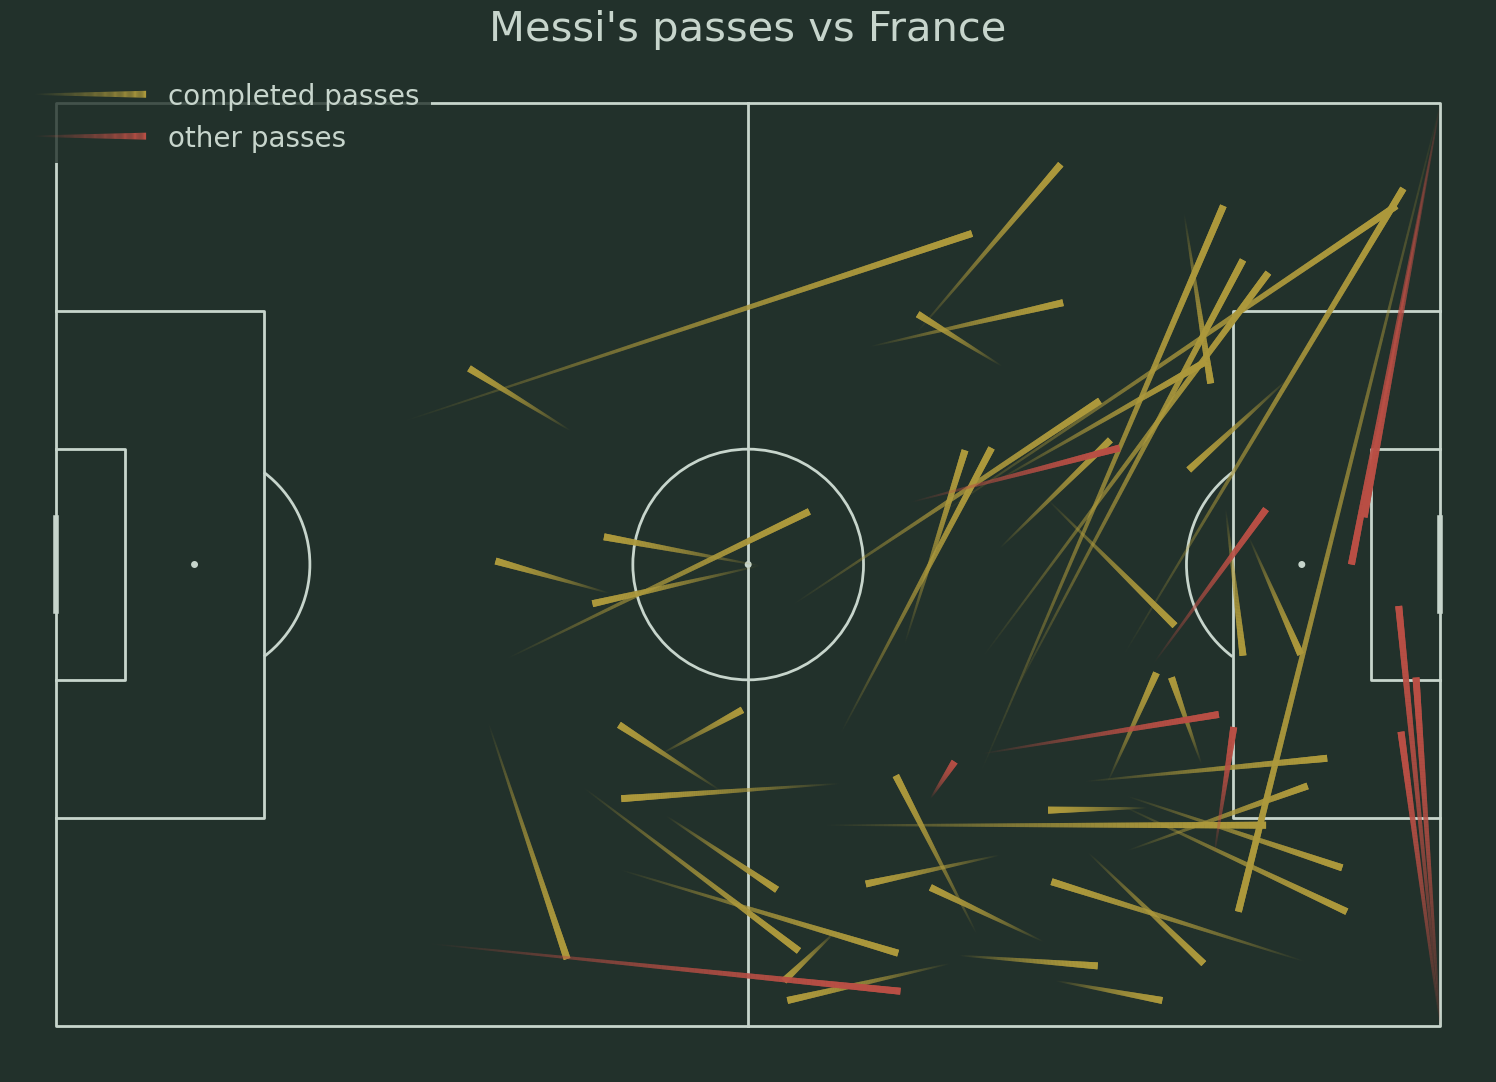

In [170]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the completed passes
lc1 = pitch.lines(df_pass[mask_complete].x, df_pass[mask_complete].y,
                  df_pass[mask_complete].end_x, df_pass[mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='completed passes',
                  color='#ad993c', ax=ax)

# Plot the other passes
lc2 = pitch.lines(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
                  df_pass[~mask_complete].end_x, df_pass[~mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='other passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
fig.suptitle("Messi's passes vs France", fontsize = 30)

In [175]:
df_pass = df.loc[(df.pass_assisted_shot_id.notnull()) & (df.player_id == 5503),
                 ['x', 'y', 'end_x', 'end_y', 'pass_assisted_shot_id', 'id']]

df_shot = (df.loc[(df.type_name == 'Shot') & (df.team_name == 'Argentina'),
                  ['id', 'outcome_name', 'shot_statsbomb_xg']]
           .rename({'id': 'pass_assisted_shot_id'}, axis=1))

df_pass = df_pass.merge(df_shot, how='left').drop('pass_assisted_shot_id', axis=1)

mask_goal = df_pass.outcome_name == 'Goal'

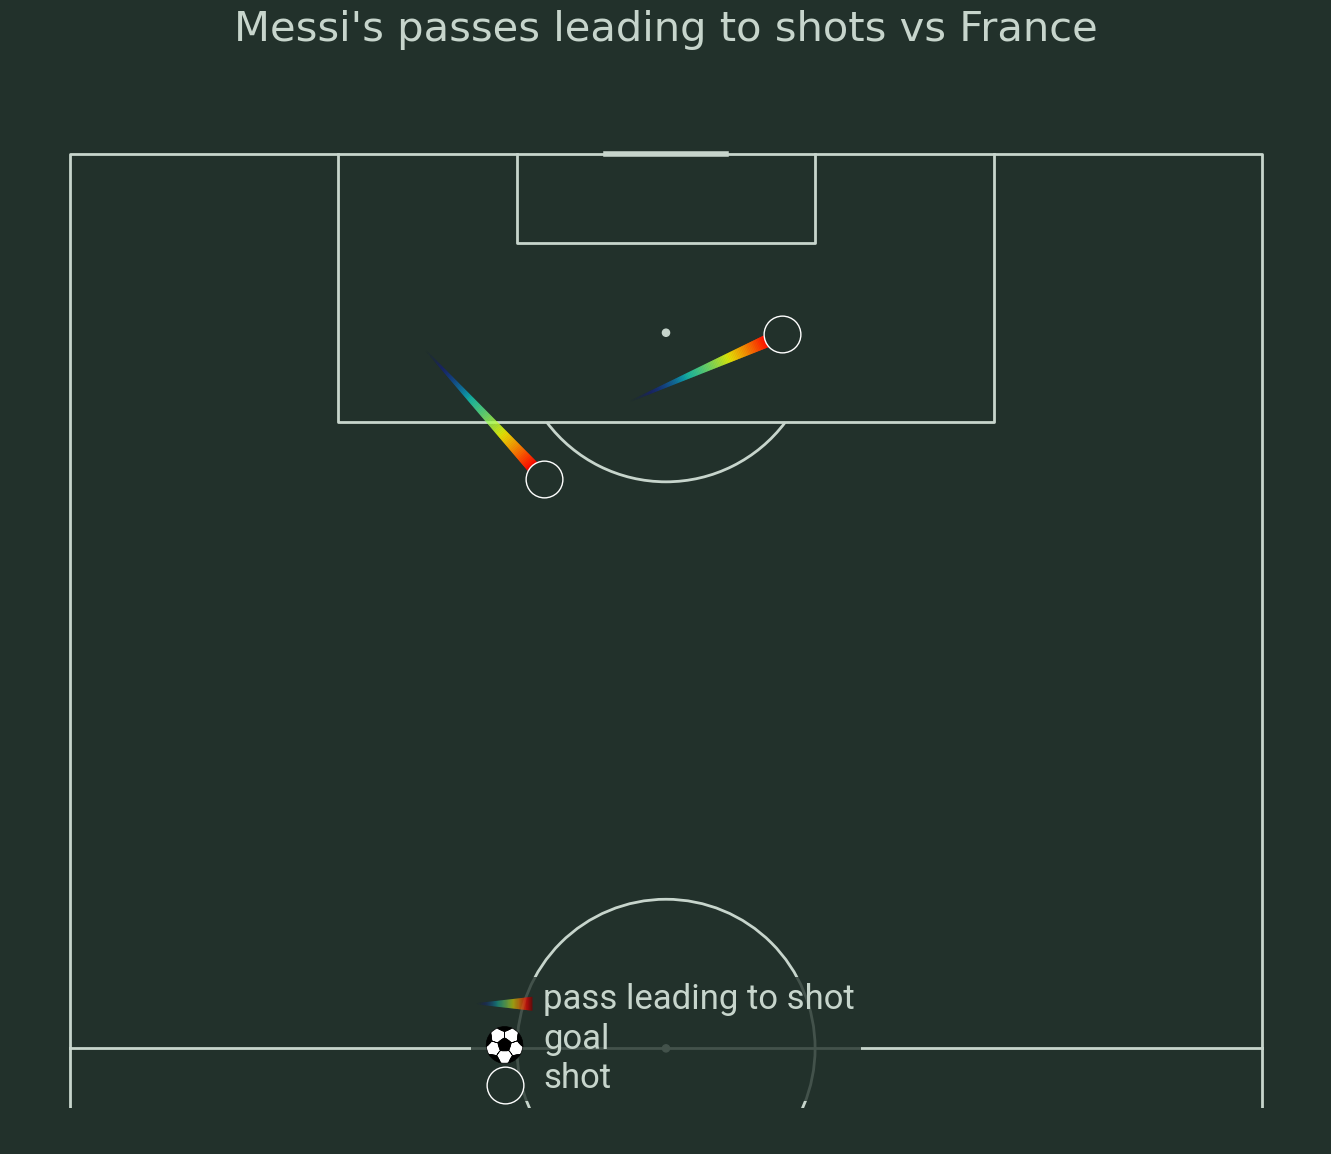

In [176]:
robotto_regular = FontManager()

# Setup the pitch
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc',
                      half=True, pad_top=2)
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0, figheight=12,
                      title_height=0.08, title_space=0, axis=False,
                      grid_height=0.82)
fig.set_facecolor('#22312b')

# Plot the completed passes
pitch.lines(df_pass.x, df_pass.y, df_pass.end_x, df_pass.end_y,
            lw=10, transparent=True, comet=True, cmap='jet',
            label='pass leading to shot', ax=axs['pitch'])

# Plot the goals
pitch.scatter(df_pass[mask_goal].end_x, df_pass[mask_goal].end_y, s=700,
              marker='football', edgecolors='black', c='white', zorder=2,
              label='goal', ax=axs['pitch'])
pitch.scatter(df_pass[~mask_goal].end_x, df_pass[~mask_goal].end_y,
              edgecolors='white', c='#22312b', s=700, zorder=2,
              label='shot', ax=axs['pitch'])

# set legend
legend = axs['pitch'].legend(facecolor='#22312b', edgecolor='None',
                             loc='lower center', handlelength=4)
for text in legend.get_texts():
    text.set_fontproperties(robotto_regular.prop)
    text.set_fontsize(25)
    
fig.suptitle("Messi's passes leading to shots vs France", fontsize = 30)

plt.show()  # If you are using a Jupyter notebook you do not need this line

In [177]:
# Filtered events DataFrame
filtered_events = df_pass

# Display the filtered events in a table
display(filtered_events)

,x,y,end_x,end_y,id,outcome_name,shot_statsbomb_xg
0,106.8,23.9,98.2,31.8,6df8ce2d-052e-42fe-ab80-f3ff68526fd2,Saved,0.041590
1,103.4,37.6,107.9,47.8,4110d7e1-c550-49c4-a07f-80df35b94088,Blocked,0.232606


# Link used for this visualization

In [ ]:
#https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_lines.html#sphx-glr-gallery-pitch-plots-plot-lines-py